In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt


V = 42
E = 87
read_country = open("europe.txt")
read_edges = open("dist.txt")
country = []
edges = []  
G = nx.Graph()  
matrix = [[] for i in range(V)] 
for i in range(V):
    pars_one = read_country.readline().split('.')
    num, name = pars_one[0], pars_one[1][:-1]
    country.append(name)

for i in range(E):
    pars_two = read_edges.readline().split()
    a, b = int(pars_two[0]), int(pars_two[1])
    matrix[a].append(b)
    matrix[b].append(a)
    edges.append([a, b])


for i in range(E):
    a, b = edges[i]
    G.add_edge(country[a], country[b])

In [9]:
colors_map = {}  
colors_dict = [1, 0.6, 0.3, 0.1]  
colors_friend = [[] for i in range(V)] 


def bfs(colors_dict, colors_map, matrix, colors_friend, used):
    start = 0
    q = [start]
    q1 = []
    name = country[start]
    colors_map[name] = 1
    while q:
        x = q.pop()
        name = country[x]
        c = None
        used[x] = 1
        for i in colors_dict:
            if i not in colors_friend[x]:
                c = i
                break
        colors_map[name] = c

        for i in matrix[x]:
            if used[i] == 0:
                q1.append(i)
                colors_friend[i].append(c)
        if not q:
            q = q1[::]
            q1 = []


used = [0] * V
bfs(colors_dict, colors_map, matrix, colors_friend, used)
val = [colors_map.get(node, 0.25) for node in G.nodes()]
print(val)

[0.1, 1, 0.6, 0.6, 0.6, 0.3, 1, 1, 1, 0.3, 0.6, 0.6, 0.3, 1, 0.3, 0.1, 1, 0.1, 0.6, 1, 0.1, 1, 1, 0.1, 0.3, 1, 0.1, 1, 0.6, 1, 0.6, 0.3, 0.6, 0.3, 0.3, 0.6, 1, 1, 0.6, 1, 1, 1]


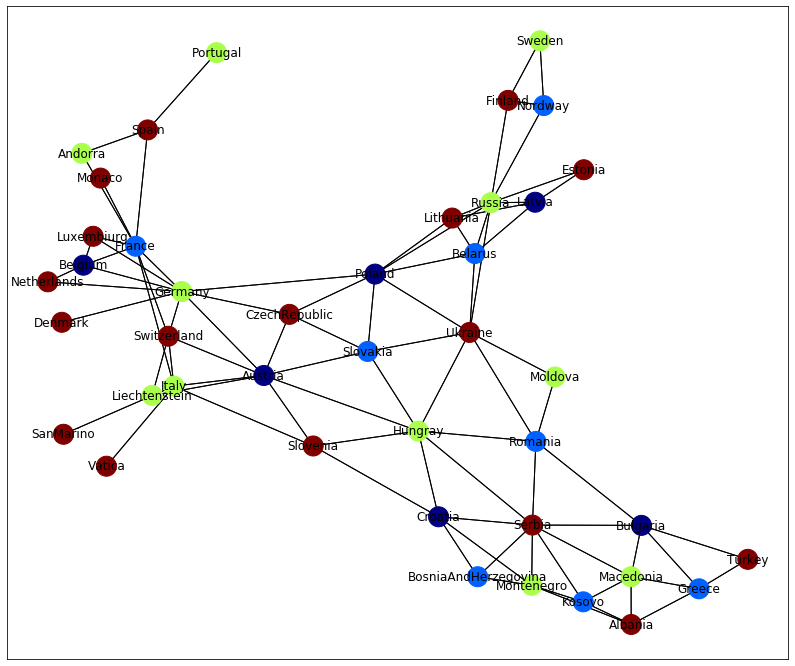

In [10]:
plt.figure(figsize=(14, 12))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, cmap=plt.get_cmap('jet'), node_size=400, node_color=val)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_edges(G, pos, arrows=False)
plt.show()